# Разведочный анализ

## Импорт необходимых библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATASET = 'https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/refs/heads/main/datasets/abalone.csv'

In [4]:
df = pd.read_csv(DATASET)

## Описание данных

Sex - номинальный - M, F и I (младенцы)

Length - непрерывная - мм - Самый длинный размер раковины

Diameter - непрерывный - мм - перпендикулярен длине

Height - непрерывный - мм - с мясом в раковине

Whole weight - непрерывный - граммы - целое морское ушко

Shucked weight - непрерывный - в граммах

Viscera weight - непрерывный - в граммах - вес потрохов (после обескровливания)

Shell weight - непрерывный - в граммах - после сушки

Rings - целое число - +1,5 указывает возраст в годах (целевой показатель)

## Общее исследование данных

Первые 5 данных

In [5]:
df.head(5)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125           NaN          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

Размер датасета

In [6]:
df.shape

(4177, 9)

Информация о типах данных и пропусках

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Основные числовые характеристики

In [8]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4078.000000  4177.000000   4078.000000     4177.000000   
mean      0.523992     0.407840     0.139516      0.827306        0.359367   
std       0.120093     0.099286     0.041827      0.490348        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.440500        0.186000   
50%       0.545000     0.425000     0.140000      0.798500        0.336000   
75%       0.615000     0.480000     0.165000      1.150875        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4127.000000  4177.000000  
mean         0.180594      0.239072     9.933684  
std          0.109614      0.138942     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.235000     9.000000  
75%          0.253000      0.328250    11.000000  
max          0.760000      1.005000    29.000000

In [9]:
df.describe(include='object')

Sex
count   4177
unique     4
top        M
freq    1447

Проверка дубликатов

In [10]:
df.duplicated().sum()

0

Проверка пропусков

In [11]:
df.isnull().mean() * 100

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

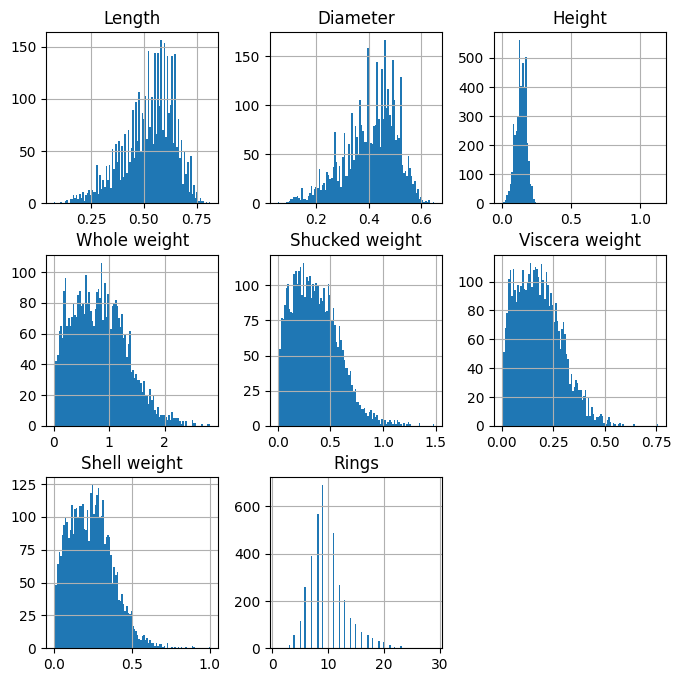

In [12]:
df.hist(bins=100, figsize=(8,8));

In [13]:
# Sex	0.000000
# Length	0.000000
# Diameter	2.370122
# Height	0.000000
# Whole weight	2.370122
# Shucked weight	0.000000
# Viscera weight	0.000000
# Shell weight	1.197031
# Rings	0.000000

In [14]:
diametr = df['Diameter'].median()

df['Diameter'].fillna(diametr, inplace=True)

<ipython-input-14-3aa7d8a76482>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Diameter'].fillna(diametr, inplace=True)


In [15]:
whole = df['Whole weight'].median()

df['Whole weight'].fillna(whole, inplace=True)

<ipython-input-15-38bdfdc85893>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Whole weight'].fillna(whole, inplace=True)


In [16]:
shell = df['Shell weight'].median()

df['Shell weight'].fillna(shell, inplace=True)

<ipython-input-16-0920384c4b81>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shell weight'].fillna(shell, inplace=True)


In [17]:
df.isnull().sum().sum()

0

## Было проведено исследование данных. В ходе которого выявляено, что датасен не имеет дупликатов, но имеет пропуски, которые заменены на медиану столбца.

# Однофакторный анализ

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Столбец Sex

In [19]:
df['Sex'].value_counts(normalize=True)

Sex
M    0.346421
I    0.305482
F    0.301412
f    0.046684
Name: proportion, dtype: float64

In [20]:
df['Sex'] = df['Sex'].replace('f', 'F')

In [21]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [22]:
df['Sex'].value_counts(normalize=True)

Sex
F    0.348097
M    0.346421
I    0.305482
Name: proportion, dtype: float64

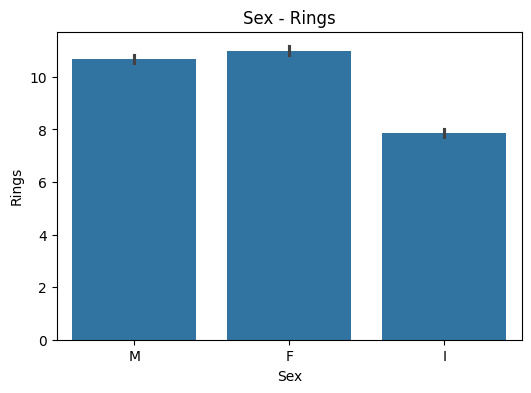

In [23]:
plt.figure(figsize=(6,4))

sns.barplot(data=df, x='Sex', y='Rings')
plt.title('Sex - Rings')
plt.show()

In [24]:
df.groupby('Sex').agg({'Rings' : ['mean', 'median']})

Rings       
          mean median
Sex                  
F    11.001376   10.0
I     7.872257    8.0
M    10.678645   10.0

## **Вывод:** в ходе исследования столбца Sex выяснилось, что есть значение f, которое скорее является ошибкой и было принято решение заменить его на F

Столбец Length

<Axes: >

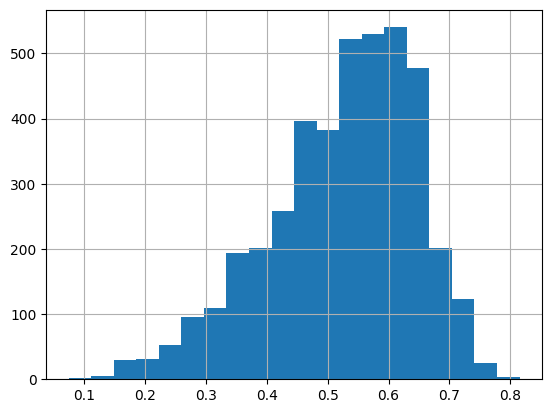

In [25]:
df.Length.hist(bins=20)

In [26]:
df.Length.min(), df.Length.max()

(0.075, 0.815)

In [27]:
df.Length.corr(df.Rings)

0.5567195769296179

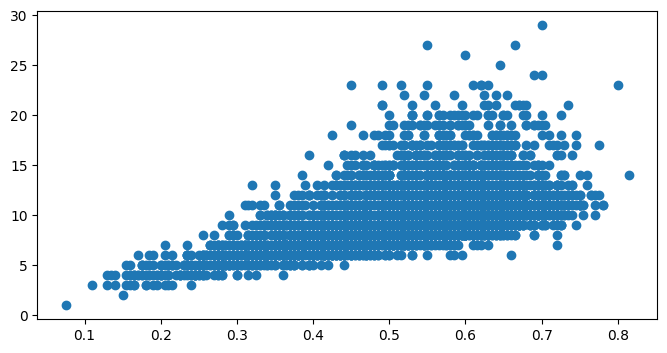

In [28]:
plt.figure(figsize=(8,4))

plt.scatter(df.Length, df.Rings)

## **Вывод:** в ходе исследования длины и возраста выяснилось, что они  имеют зависимость похожую на линейную. А также имеют низкую корреляцию

# Для быстрого просмота данных принято решение использовать profilling

In [51]:
# !pip install ydata_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     / 17.9 MB 21.5 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.4 MB/s eta 0:00:00


In [52]:
from ydata_profiling import ProfileReport

In [53]:
profile_report = ProfileReport(df, title='Pandas Profiling Report')

In [54]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [78]:
profile_report.to_file('abalone_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Выводы:
1. По графикам видно, что большинство столбцов имеет нормальное распределение.
2. Графики отношений к Rings имеют линейную зависимость
3. Корреляция варьируется от 50 до 65

# Исследование данных на корреляцию

Корреляция Пирсона

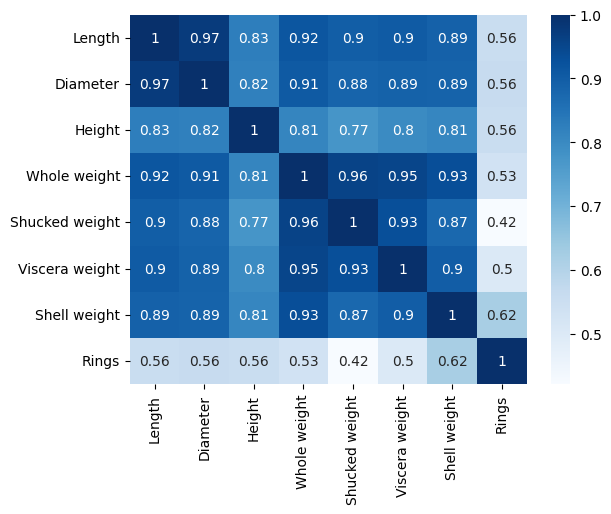

In [29]:
corrPir = df.corr(numeric_only=True)
sns.heatmap(corrPir, cmap='Blues', annot=True)
plt.show()

Корреляция Спирмена

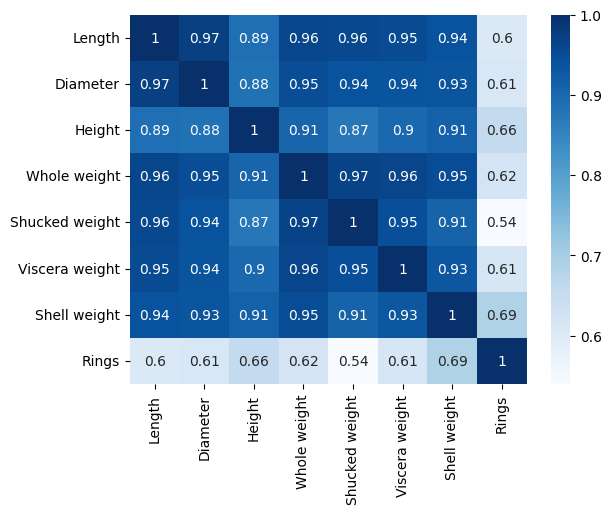

In [30]:
corrSpir = df.corr(method='spearman', numeric_only=True)
sns.heatmap(corrSpir, cmap='Blues', annot=True)
plt.show()

Корреляции Кенделля

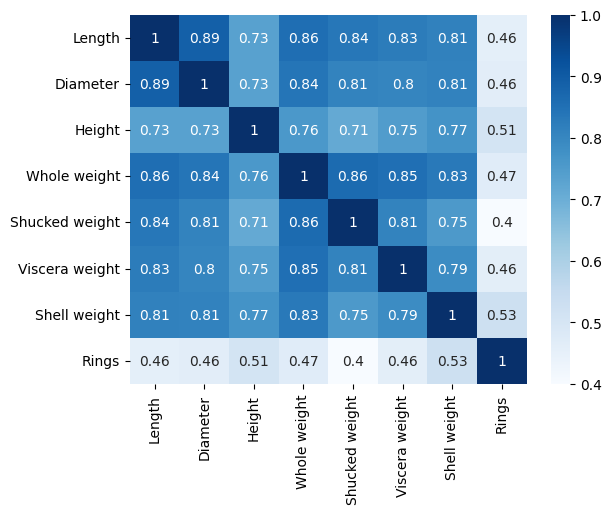

In [31]:
corrKend = df.corr(method = 'kendall', numeric_only=True)
sns.heatmap(corrKend, cmap='Blues', annot=True)
plt.show()

## V-мера Крамера

In [32]:
!pip install association-metrics -q

In [33]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

/usr/local/lib/python3.10/dist-packages/association_metrics/categorical.py:100: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.matrix[x][y] = 1


Sex
Sex  1.0

In [73]:
from scipy.stats import f_oneway

Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

Category       Numerical Is correlated
0      Sex          Length           Yes
1      Sex        Diameter           Yes
2      Sex          Height           Yes
3      Sex    Whole weight           Yes
4      Sex  Shucked weight           Yes
5      Sex  Viscera weight           Yes
6      Sex    Shell weight           Yes
7      Sex           Rings           Yes

## Вывод: проделав анализ на корреляцию. Получили следующие данные:
1. Корреляция Пирсона, Спирмена и Кенделля показывают сильную зависимость между числовыми столбцами, кроме столбца Rings
2. Таблица зависимость числовым и категориальным показывается, что есть корреляция

# Анализ целевой переменной

<Axes: >

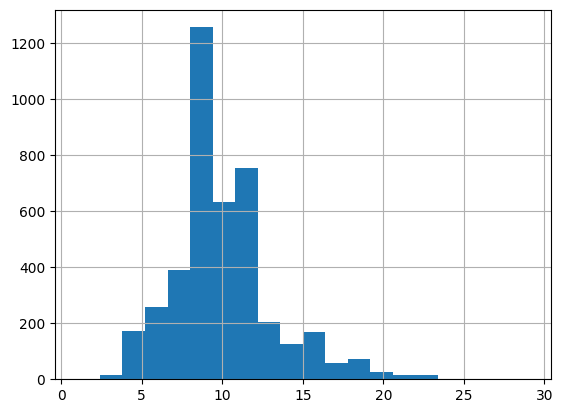

In [75]:
df.Rings.hist(bins=20)

## Целевая переменная имеет нормальное распределение, но в конце имеет хвост из-за которого модель будет давать разбросанные данные. Ошибок будет меньше, если не включать данный хвост

# Сравнение работы Pandas и Polars

In [34]:
df_big = df.copy()

for i in range(100):
  df_big = pd.concat([df_big, df])

df_big.to_csv("abalone_big.csv", index=False)

In [35]:
df_big.shape, df.shape

((421877, 9), (4177, 9))

In [36]:
!pip install polars

import polars as pl

## Загрузка данных

In [37]:
%%time

df_pl = pl.read_csv("abalone_big.csv")

CPU times: user 329 ms, sys: 43.8 ms, total: 373 ms
Wall time: 374 ms


In [38]:
%%time

df = pd.read_csv("abalone_big.csv")

CPU times: user 295 ms, sys: 39.1 ms, total: 334 ms
Wall time: 331 ms


## Вывод: результат выполнения одинаковый

## Выбор и фильтрация данных

In [39]:
df.head(5)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.7985          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [40]:
%%time

df[['Length', 'Height']]

CPU times: user 3.75 ms, sys: 0 ns, total: 3.75 ms
Wall time: 2.6 ms


Length  Height
0        0.455   0.095
1        0.350   0.090
2        0.530   0.135
3        0.440   0.125
4        0.330   0.080
...        ...     ...
421872   0.565   0.165
421873   0.590   0.135
421874   0.600   0.205
421875   0.625   0.150
421876   0.710   0.195

[421877 rows x 2 columns]

In [42]:
%%time

df_pl[['Length', 'Height']]

# df_pl.select(pl.col(['Length', 'Height']))

CPU times: user 159 µs, sys: 20 µs, total: 179 µs
Wall time: 187 µs


shape: (421_877, 2)
┌────────┬────────┐
│ Length ┆ Height │
│ ---    ┆ ---    │
│ f64    ┆ f64    │
╞════════╪════════╡
│ 0.455  ┆ 0.095  │
│ 0.35   ┆ 0.09   │
│ 0.53   ┆ 0.135  │
│ 0.44   ┆ 0.125  │
│ 0.33   ┆ 0.08   │
│ …      ┆ …      │
│ 0.565  ┆ 0.165  │
│ 0.59   ┆ 0.135  │
│ 0.6    ┆ 0.205  │
│ 0.625  ┆ 0.15   │
│ 0.71   ┆ 0.195  │
└────────┴────────┘

## Вывод: Polars на много быстрее

## Агрегация данных

In [43]:
df.head(5)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.7985          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [48]:
%%time

df.groupby('Sex').agg({'Length' : 'mean', 'Height' : 'max'})

CPU times: user 31.1 ms, sys: 0 ns, total: 31.1 ms
Wall time: 31 ms


Length  Height
Sex                  
F    0.572978   1.130
I    0.427273   0.220
M    0.560059   0.515

In [49]:
%%time

df_pl.group_by('Sex').agg([pl.mean('Length'), pl.max('Height')])

CPU times: user 22.5 ms, sys: 805 µs, total: 23.3 ms
Wall time: 14.6 ms


shape: (3, 3)
┌─────┬──────────┬────────┐
│ Sex ┆ Length   ┆ Height │
│ --- ┆ ---      ┆ ---    │
│ str ┆ f64      ┆ f64    │
╞═════╪══════════╪════════╡
│ F   ┆ 0.572978 ┆ 1.13   │
│ M   ┆ 0.560059 ┆ 0.515  │
│ I   ┆ 0.427273 ┆ 0.22   │
└─────┴──────────┴────────┘

## Вывод: Polars чуть-чуть быстрее

In [50]:
!pip freeze > requirements.txt